# **Marketing Campaign Analysis**

## **Import the necessary libraries and load the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

In [ ]:
# Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv")

In [ ]:
# Copy the dataset
df = data.copy()

In [ ]:
# Understanding the shape of the dataset
df.shape

(2240, 27)

In [ ]:
# First 3 rows
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0


In [ ]:
# Last 3 rows
df.tail(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


In [ ]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### **Observations and Insights:**

**Data types**:
  - 24 numerical columns: 1 float column (`Income`) and 23 integer columns.
  - 3 categorical columns: `Education`, `Marital_Status`, `Dt_Customer`.

**Missing values**:
  - All columns have 2240 non-null entries, except `Income` which has 2216 non-null entries (24 missing values).

In [ ]:
# Find the percentage of missing values, display only columns with missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

,0
Income,1.071429


#### **Observations and Insights:**

The `Income` column has 1.07% missing values (24 out of 2240 rows). Since the percentage of missing values is small, we can later impute the missing values with the median. This approach preserves the data while avoiding any bias caused by outliers, as the median is a robust statistic.

In [ ]:
# Checking the count of unique values in each column
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [ ]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

In [ ]:
# Drop ID column
# All ID values are unique, this means having it as a separate column might be redundant
df.drop(["ID"], axis=1, inplace=True)

## **Exploratory Data Analysis (EDA)**


In [ ]:
# Statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [ ]:
# Categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

for column in cols:
    print(column, ":", df[column].unique())
    print("-" * 100)

Education : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
----------------------------------------------------------------------------------------------------
Marital_Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
----------------------------------------------------------------------------------------------------
Kidhome : [0 1 2]
----------------------------------------------------------------------------------------------------
Teenhome : [0 1 2]
----------------------------------------------------------------------------------------------------
Complain : [0 1]
----------------------------------------------------------------------------------------------------


#### **Observations and Insights:**

- The `Education` column contains categories representing different educational levels. `2n Cycle` likely refers to a post-graduate degree, similar to a `Master`. Since both represent advanced education levels, combining them simplifies the data without losing meaning.

- `Marital_Status` includes valid categories like `Single`, `Married`, `Divorced`, and `Widow`, but also contains errors or sarcastic entries like `Absurd` and `YOLO`. `Single` and `Alone` both refer to individuals not in a relationship, so they can be merged into `Single` for simplicity. `Together` and `Married` both imply being in a relationship, so they should be combined into `Married`. `Absurd` and `YOLO` are not valid marital statuses and should be replaced with `Unknown` to clean the data.

- `Kidhome` represents the number of children in a household, with values ranging from 0 to 2. Similar to `Kidhome`, `Teenhome` represents the number of teenagers in the household, also ranging from 0 to 2.

- `Complain` is a binary column indicating whether the customer has made a complaint (0 for no, 1 for yes).

In [ ]:
# Combining categories and renaming
# `2n Cycle` -> `Master`
df["Education"].replace({"2n Cycle": "Master"}, inplace=True)

# `Alone` -> `Single`
df["Marital_Status"].replace({"Alone": "Single"}, inplace=True)

# `Together` -> `Married`
df["Marital_Status"].replace({"Together": "Married"}, inplace=True)

# `Absurd`,`YOLO` -> `Unknown`
df["Marital_Status"].replace({"Absurd": "Unknown", "YOLO": "Unknown"}, inplace=True)

In [ ]:
# Value proportions in every column
for column in cols:
    # Calculate, round, and format the percentage of each unique value in the column
    percentages = (df[column].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print(percentages)
    print("-" * 50)  # Separator for readability

Education
Graduation    50.3%
Master        25.6%
PhD           21.7%
Basic          2.4%
Name: proportion, dtype: object
--------------------------------------------------
Marital_Status
Married     64.5%
Single      21.6%
Divorced    10.4%
Widow        3.4%
Unknown      0.2%
Name: proportion, dtype: object
--------------------------------------------------
Kidhome
0    57.7%
1    40.1%
2     2.1%
Name: proportion, dtype: object
--------------------------------------------------
Teenhome
0    51.7%
1    46.0%
2     2.3%
Name: proportion, dtype: object
--------------------------------------------------
Complain
0    99.1%
1     0.9%
Name: proportion, dtype: object
--------------------------------------------------


### **Univariate Analysis on Numerical and Categorical data**


In [ ]:
# Function that plots a boxplot and a histogram along the same scale for all numerical values
def histogram_boxplot(data, feature):
  fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': (1,3)}, figsize = (12,5))
  sns.boxplot(data=df, x=feature, showmeans = True, color='pink', ax = ax[0])
  sns.histplot(data=df, x=feature, kde=True, ax = ax[1])
  ax[1].axvline(df[feature].mean(), color='green', linestyle='--')
  ax[1].axvline(df[feature].median(), color='red', linestyle='-.')

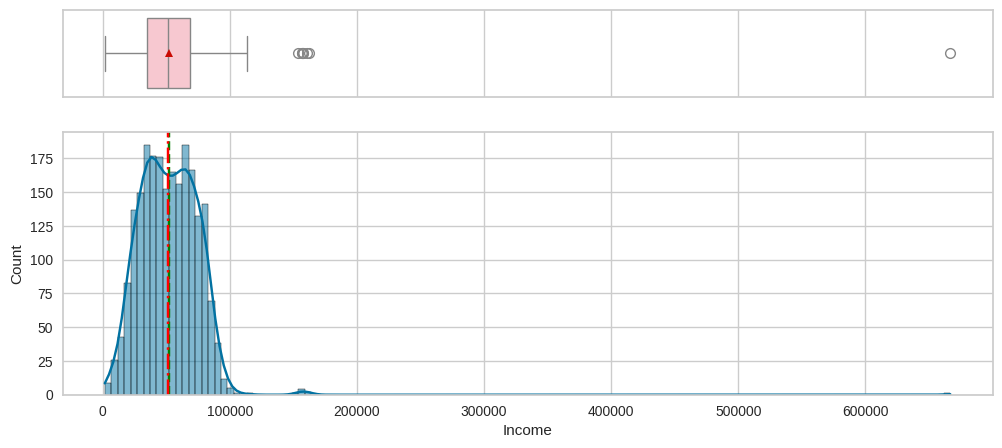

In [ ]:
# Plot for `Income`
histogram_boxplot(df, 'Income')

#### **Observations and Insights:**

- The histogram and box plot suggest that the `Income` variable has a **right-skewed distribution**, with most individuals earning lower incomes, while a smaller group of individuals have very high incomes. This is evident from the longer tail on the right side of the distribution.
- The extreme values (**outliers**) on the higher end indicate that there are a few individuals with significantly higher incomes. These outliers could represent high-net-worth individuals or errors in data entry. To determine whether to treat them as outliers, we can use the **IQR (Interquartile Range) method** to check if they lie beyond the acceptable range.

In [ ]:
# Formula to calculate IQR: q3 - q1
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)
iqr = q3 - q1
print("Q1:", q1, "Q3:", q3, "IQR:", iqr)

# Formula to calculate upper whisker: q3 + 1.5 * IQR
whisker = q3 + 1.5 + iqr
print("Upper whisker:", whisker)

Q1: 35303.0 Q3: 68522.0 IQR: 33219.0
Upper whisker: 101742.5


In [ ]:
# Show outliers
outliers = df[df["Income"] > whisker].index
outliers

Index([124, 164, 203, 252, 617, 646, 655, 687, 1300, 1653, 1898, 2132, 2233], dtype='int64')

Only 13 rows determined as outliers using IQR.

In [ ]:
# Drop the outliers
df.drop(index=outliers, inplace=True)

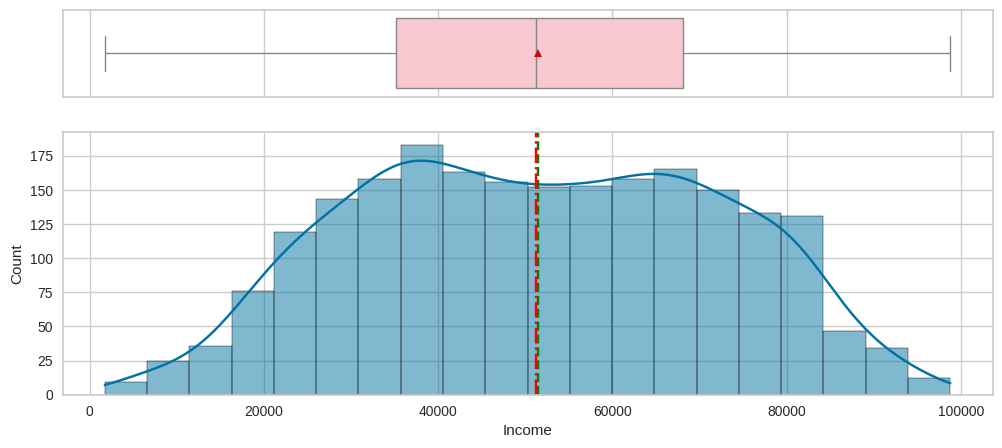

In [ ]:
# Plot for `Income` without outliers
histogram_boxplot(df, 'Income')

### **Bivariate Analysis**

### **Feature Engineering and Data Processing**


## **Important Insights from EDA and Data Preprocessing**

## **Data Preparation for Segmentation**

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

**Observation and Insights:**

### **Applying PCA**

**Observation and Insights:**

## **K-Means**

### **Applying KMeans on the PCA data and visualize the clusters**

### **Cluster Profiling**

**Observations and Insights:**

### **Describe the characteristics of each cluster**

**Summary of each cluster:**

## **K-Medoids**

### **Visualize the clusters using PCA**

### **Cluster Profiling**

**Observations and Insights:**

### **Characteristics of each cluster**

**Summary for each cluster:**

**Observations and Insights:**

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

### **Visualize the clusters using PCA**

### **Cluster Profiling**

**Observations and Insights:**

### **Characteristics of each cluster**

**Summary of each cluster:**

## **DBSCAN**

### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

**Observations and Insights:**


### **Characteristics of each cluster**

**Summary of each cluster:**

## **Gaussian Mixture Model**

**Observations and Insights:**

### **Visualize the clusters using PCA**

### **Cluster Profiling**

**Observations and Insights:**


### **Characteristics of each cluster**

**Summary of each cluster:**

## **Conclusion and Recommendations**
